In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')
print(df.shape)
print('\n')
df.head()

(1025, 14)




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

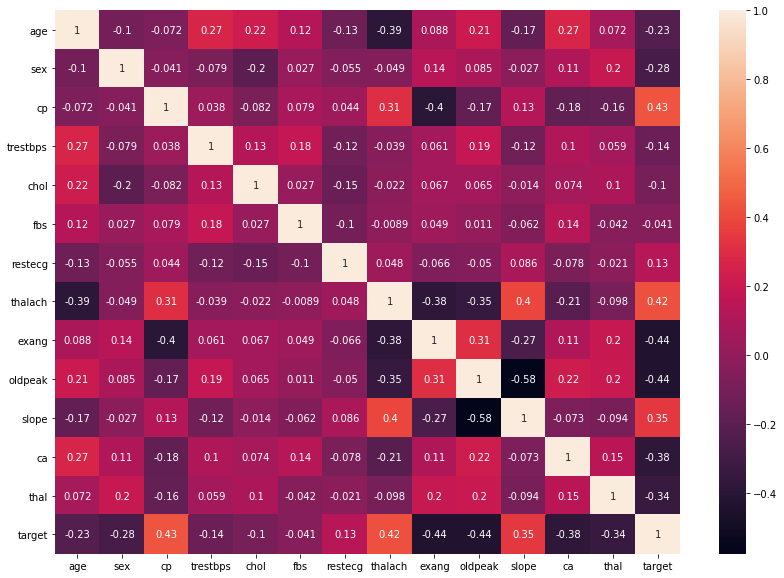

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='target', ylabel='count'>

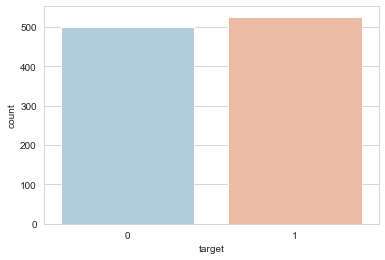

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='target', ylabel='count'>

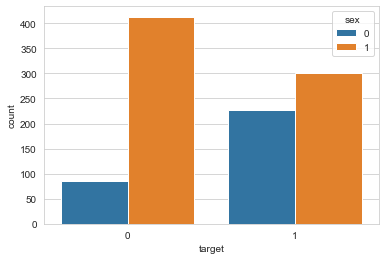

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',hue='sex',data=df)

<AxesSubplot:xlabel='sex', ylabel='age'>

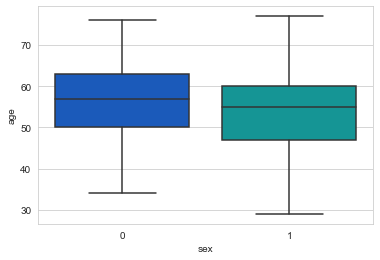

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex',y='age',data=df,palette='winter')

<AxesSubplot:>

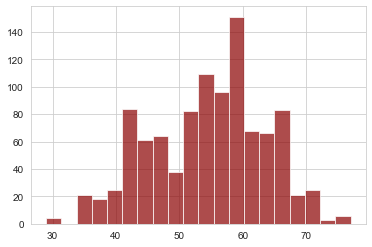

In [9]:
df['age'].hist(bins=20,color='darkred',alpha=0.7)

In [10]:
X=df.drop(['target', 'fbs', 'chol'], axis=1)
#X=df.drop('target', axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.metrics import accuracy_score

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(X_train[0:1])
print(X_test[0:1])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

      age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  \
1020   59    1   1       140        1      164      1      0.0      2   0   

      thal  
1020     2  
     age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal
527   62    0   0       124        1      163      0      0.0      2   0     2


In [12]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(n_estimators=100, random_state=42)
bagg.fit(X_train, y_train)

BaggingClassifier(n_estimators=100, random_state=42)

In [13]:
y_pred_bagg=bagg.predict(X_test)
score=accuracy_score(y_test, y_pred_bagg)
print(score)

0.9805194805194806


In [14]:
import joblib
joblib.dump(bagg,'heartdisease.pkl')
# pickle_out=open("heartdisease.pkl", "wb")
# pickle.dump(bagg, pickle_out)
# pickle_out.close()

['heartdisease.pkl']